참조 https://hyunlee103.tistory.com/39   
https://m.blog.naver.com/sooftware/221646956569

In [1]:
import librosa
import librosa.display as dsp
import matplotlib.pyplot as plt

import numpy as np

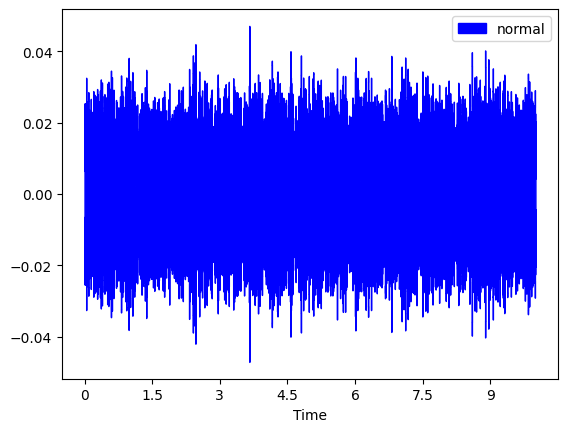

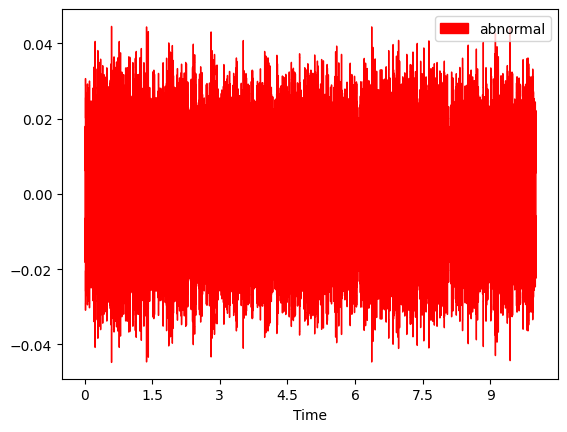

In [2]:
def visualize_data(data, sr, label, color='b'):
    dsp.waveshow(data,sr=sr, label=label, color=color)
    plt.legend(loc="upper right")
    plt.show()


normal_data, sample_rate = librosa.load('../../../data/mimii/-6_dB/fan/id_00/normal/00000000.wav', sr=16000)
abnormal_data, sample_rate = librosa.load('../../../data/mimii/-6_dB/fan/id_00/abnormal/00000000.wav', sr=16000)

visualize_data(normal_data, sample_rate, "normal")
visualize_data(abnormal_data, sample_rate, "abnormal", 'r')

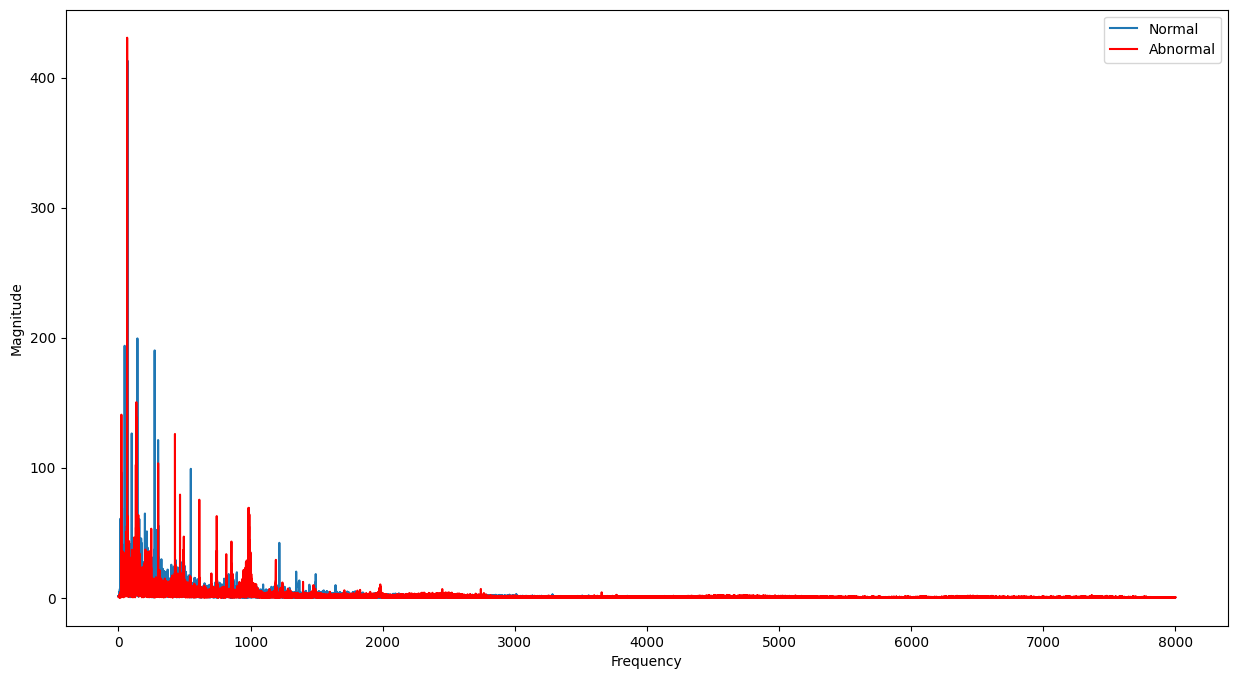

In [3]:
def get_freq_mag_of_fft(data, sr):
    # 퓨리에 연산을 빠르게 수행해주는 fft(Fast Fourier Transform)을 사용하여 변환
    # 퓨리에 연산 시 실수부와 허수부를 반환함
    fft = np.fft.fft(data) 

    # 주파수 영역에서의 세기 계산. 허수 부분은 주파수 영역에서의 위상 정보를 나타냄
    magnitude = np.abs(fft)

    # 0부터 sample_rate까지 magnitude의 개수만큼의 배열값을 만듬
    frequency = np.linspace(0, sr, len(magnitude))

    # 실수부만 보기 위해 변환값에 절대값을 씌우고, 반으로 나누면 실수부만 데이터를 확인할 수 있다.
    # 실수부와 허수부는 동일한 값을 가지고 있고, 여기서는 데이터 해석의 목적만 가지므로 실수부만 본다.
    left_frequency = frequency[:int(len(frequency)/2)]
    left_magnitude = magnitude[:int(len(magnitude)/2)]
    
    # left_frequency = frequency[:int(160000/8)]
    # left_magnitude = magnitude[:int(160000/8)]

    return left_frequency, left_magnitude

plt.figure(figsize=(15,8))
normal_frequency, normal_magnitude = get_freq_mag_of_fft(normal_data, sample_rate)
plt.plot(normal_frequency, normal_magnitude, label="Normal")
# plt.show()

# fig = plt.figure(figsize = (15,10))
abnormal_frequency, abnormal_magnitude = get_freq_mag_of_fft(abnormal_data, sample_rate)
plt.plot(abnormal_frequency, abnormal_magnitude, label="Abnormal", color='r')
# plt.show()


plt.legend(loc="upper right")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

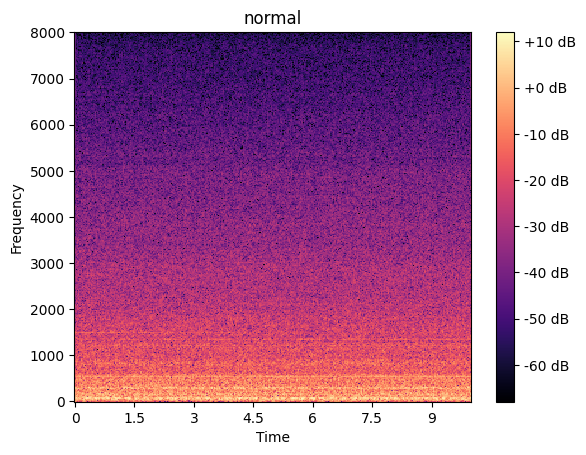

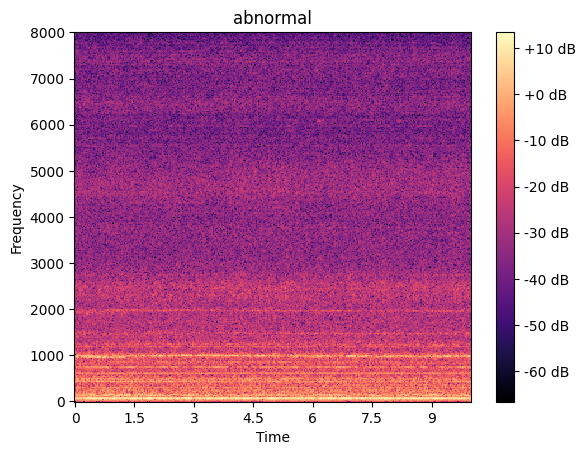

In [4]:
# n_fft는 STFT(short-time Fourier transform)에 사용되는 FFT(fast Fourier transform)의 크기를 결정합니다. 
# FFT는 주어진 시간 동안 입력 오디오 신호를 작은 시간 구간으로 나누어서 각 구간에서 주파수 변화를 추출합니다. 
# 이 구간의 크기가 n_fft로 결정됩니다. 
# 작은 구간을 사용하면 더 높은 분해능을 얻을 수 있지만 계산 비용이 더 많이 듭니다.

# hop_length는 STFT에서 사용되는 두 연속 구간 사이의 샘플 수입니다. 
# 따라서 이 값은 FFT 윈도우를 겹치게 만듭니다. 
# 이 값이 작을수록 주파수와 시간 분해능이 더 높아집니다. 또한 STFT 계산에 필요한 시간도 증가하게 됩니다.

def visualize_stft(data, title):
    stft = librosa.stft(data, n_fft=1024, hop_length=512)
    spectogram = librosa.amplitude_to_db(np.abs(stft))

    dsp.specshow(spectogram, sr=sample_rate, hop_length=512, n_fft=1024, x_axis='time', y_axis='hz')
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show()

visualize_stft(normal_data, "normal")
visualize_stft(abnormal_data, "abnormal")


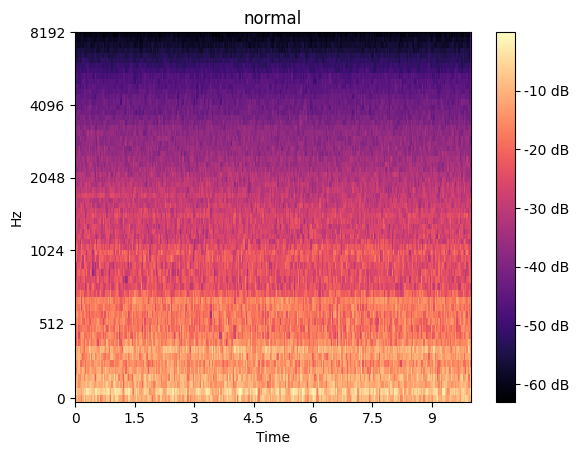

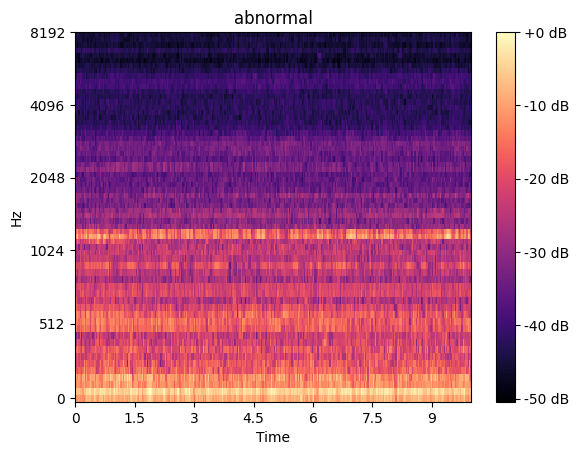

In [5]:
def visualize_mel_spec(data, title):
    mel_spec = librosa.feature.melspectrogram(y=data, n_fft=1024, hop_length=512, n_mels=64)
    mel_spec = librosa.power_to_db(mel_spec, ref=np.max)

    dsp.specshow(mel_spec, sr=sample_rate, hop_length=512, n_fft=1024, x_axis='time', y_axis='mel')
    plt.title(title)
    plt.colorbar(format='%+2.0f dB')
    plt.show()

visualize_mel_spec(normal_data, "normal")
visualize_mel_spec(abnormal_data, "abnormal")

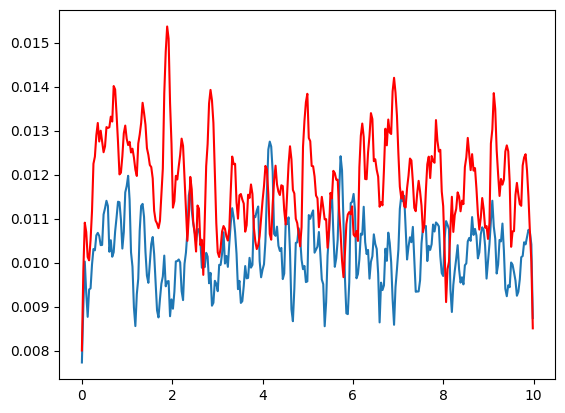

In [6]:
normal_rms = librosa.feature.rms(y=normal_data)
abnormal_rms = librosa.feature.rms(y=abnormal_data)

times = librosa.times_like(normal_rms, sr=sample_rate)
plt.plot(times, normal_rms[0])
times = librosa.times_like(abnormal_rms, sr=sample_rate)
plt.plot(times, abnormal_rms[0], color='r')
plt.show()

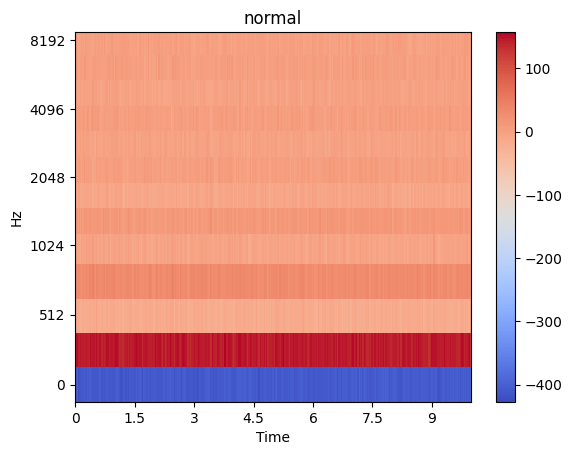

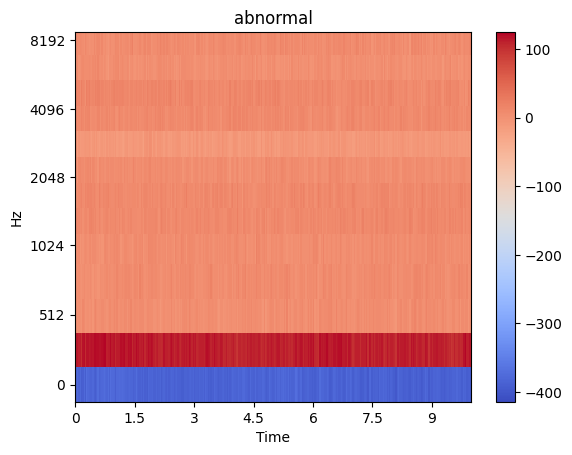

In [7]:
# ?????????????????????///

def visualize_mfcc(data, title):
    mfcc = librosa.feature.mfcc(y=data, n_fft=1024, hop_length=512, n_mfcc=13)

    dsp.specshow(mfcc, sr=sample_rate, hop_length=512, n_fft=1024, x_axis='time', y_axis='mel')
    plt.title(title)
    plt.colorbar()
    plt.show()

visualize_mfcc(normal_data, "normal")
visualize_mfcc(abnormal_data, "abnormal")

/data/home/kseorang/.pyenv/versions/3.8.10/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


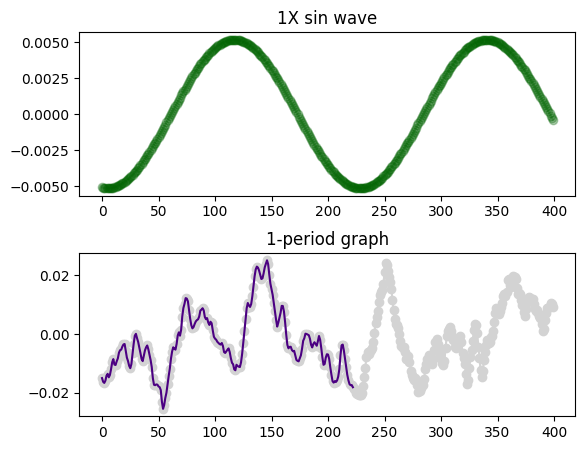

In [8]:
Fs = sample_rate
T = 1/sample_rate
s_fft = np.fft.fft(normal_data)
amplitude = abs(s_fft)*(2/len(s_fft)) 
frequency = np.fft.fftfreq(len(s_fft), T)

fft_freq = frequency.copy()
peak_index = amplitude[:int(len(amplitude)/2)].argsort()[-1]
peak_freq = fft_freq[peak_index]

fft_1x = s_fft.copy()
fft_1x[fft_freq!=peak_freq] = 0
filtered_data = 2*np.fft.ifft(fft_1x)
cycle = round(Fs/peak_freq)

plt.subplot(2, 1, 1)
plt.title('1X sin wave')
plt.plot(filtered_data[:400], marker='o', color='darkgreen', alpha=0.3)
plt.subplot(2, 1, 2)
plt.title('1-period graph')
plt.plot(normal_data[:400], marker='o', color='lightgrey')
plt.plot(normal_data[:cycle], color='indigo')
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

# https://lifelong-education-dr-kim.tistory.com/entry/Python-numpy-FFT-IFFT-%EC%82%AC%EC%9A%A9%ED%95%98%EA%B8%B0-%EC%A3%BC%EA%B8%B0%EB%B6%84%EC%84%9D

In [9]:
# nzero_crossing = librosa.zero_crossings(normal_data, pad=False)
# azero_crossing = librosa.zero_crossings(abnormal_data, pad=False)
# print(sum(nzero_crossing), sum(azero_crossing))

In [10]:
# duration = librosa.get_duration(y=normal_data)

# # Find peaks
# onset_env = librosa.onset.onset_strength(y=normal_data, sr=16000,
#                                          hop_length=512,
#                                          aggregate=np.median)
# peaks = librosa.util.peak_pick(onset_env, pre_max=3, post_max=3, pre_avg=3, post_avg=5, delta=0.5, wait=10)

# # Print peaks list to console
# print('Peaks detected at: ', librosa.frames_to_time(peaks, sr=16000))